# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Some Brief Notes on Basic Probability Concepts__ <br>

Author:  Tyler J. Brough <br>
Updated: October 4, 2021 <br>

---

<br>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

## __Probability Distributions__

These notes are based upon readings from the following books:

* _Doing Bayesian Data Analysis_ by John Kruschke.

* _Mathematical Statistics with Applications_ by Wackerly, Mendenhall, Scheaffer


* _Introduction to Probability and Mathematical Statistics_ by Bain & Engelhardt

* _The Cambridge Dictionary of Statistics, 4th Edition_ 

<br>
<br>

A ___probability distribution___ is the list of all possible outcomes and their corresponding probabilities. 

<br>

Notes:
* In class I said that this was a _"mapping from the event space to the probability space"_

* The distribution can be represented by a graph, a table, or a formula. 

* Sometimes a distinction is made been the probability _density_ and the probability _distribution_, the latter being when the random variable falls at or below some particular value. 

* We will use the terms interchangably and explicitly refer to the latter as the ___cumulative distribution function___ or simply the ___CDF___.


<br>

### __The Discrete Probability Density Function (Probability Mass Function)__

---

If the set of all possible values of a random variable, $X$, is a countable set,
$x_{1}, x_{2}, \ldots, x_{n}$, or $x_{1}, x_{2}, \ldots$, then $X$ is called a
__discrete random variable__. The function

$$
f(x) = P[X = x] \quad x = x_{1}, x_{2}, \ldots
$$

that assigns the probability to each possible value of $x$ will be called the 
__discrete probability density function__ (discrete PDF).

---


<br>
<br>

#### __Some Common Examples__

<br>

<u>__Example 1__</u> 

The values of the discrete pdf of a roll of a fair die can be given by the following table.

| x      | 1   | 2   | 3   | 4   | 5   | 6   |
|:-------|-----|-----|-----|-----|-----|-----|
| f(x)   | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |


<br>
<br>
<br>

<u>__Example 2__</u> 

When tossing a coin with unknown probability of heads (success). The pdf is given by the ___Bernoulli distribution function___. 

$$
f(x; \theta) = \theta^{x} (1 - \theta)^{1-x} \quad x = \{0, 1\}
$$

__Note:__ 

* $P(X = 0) = 1 - \theta$

* $P(X = 1) = \theta$

<br>

A jar contains 30 green jelly beans and 20 purple jelly beans. What is the probability of
drawing a single green? A single purple?

$$
\begin{align}
P(\mbox{drawing a single green}) &= 30/50 = 0.6\\
& \\
P(\mbox{drawing a single purple}) &= 20/50 = 0.4
\end{align}
$$

<br>

We can confirm this in `Python` as follows:


In [2]:
stats.binom(1, 0.6).pmf(1)

0.6

In [3]:
stats.binom(1, 0.6).pmf(0)

0.4

<u>__Example 3__</u> 

When tossing a coin $n$ times and counting the number of heads the pdf is given
by the ___Binomial distribution function___.

$$
f(x; n, \theta) = \binom{n}{x} \theta^{x} (1 - \theta)^{n-x}
$$

<br>

A jar contians 30 green jelly beans and 20 purple jelly beans. Suppose 10 jelly beans are
selected at random from the jar. Find the probability of obtaining exactly five purple jelly
beans if they are selected with replacement.

In [4]:
stats.binom(10, 0.4).pmf(5)

0.20065812480000034

__Note:__ often the definitions of 'success' and 'failure' are arbitrary. In this case they
should be symmetric.

<br>
<br>

### __The Cumulative Distribution Function (CDF)__

---

The __cumulative distribution function__ (CDF) of a random variable $X$ is defined for 
any real $x$ by

$$
F(x) = P[X \le x]
$$

---

<br>
<br>

<u>__Example 4__</u> 

A jar contians 30 green jelly beans and 20 purple jelly beans. Suppose
10 jelly beans are selected at random from the jar. What is the probability of getting 4 or
fewer green jelly beans?

In [5]:
stats.binom(10, 0.6).cdf(4)

0.1662386176

<br>

Check this against the following and make sure it makes sense to you based on the definitions
of a discrete random variable and the CDF given above:

<br>

In [6]:
p = 0
for i in range(5):
    p += stats.binom(10, 0.6).pmf(i)

print(f"{p : 0.10f}")

 0.1662386176


<br>

__Q:__ did you get the same answer? Why or why not?

<br>
<br>

### __The Continuous Probability Density Function__

---

A random variable $X$ is called a __conintuous random variable__ if there is a function
$f(x)$ called the __probability density function__ (pdf) of $X$, such that the CDF can be 
represented as

$$
F(X) = \int\limits_{-\infty}^{x} f(t) dt
$$

---

<br>
<br>

<u>__Example 5__</u>

Suppose the research department of a steel manufacturer believes that one of the company's rolling machines is producing sheets of steel of varying thickness. The thickness
is represented by a random variable following a uniform random variable with values between $150$ and $200$ millimeters. Any sheets less than $160$ millimeters must be 
scrapped because they are unacceptable to buyers. 

* __a.__ Calculate and interpret the mean and standard deviation of $x$, the thickness of the sheets produced by this machine. 

* __b.__ Graph the probability distribution of $x$, and show the mean on the horizontal axis. Also show the 1- and 2-standard deviation intervals around the mean.

* __c.__ Calculate the fraction of steel sheets produced by this machine that have to be scrapped. 

<br>

__Solution__

__a.__

To calculate the mean and standard deviation for $x$, we substitute 150 and 200 millimeters for $c$ and $d$, respectively, in the formulas for uniform random variables.
Thus, 

$$
\mu = \frac{c + d}{2} = \frac{150 + 200}{2} = 175 \mbox{ millimeters}
$$

and

$$
\sigma = \frac{d - c}{\sqrt{12}} = \frac{200 - 150}{\sqrt{12}} = \frac{50}{3.464} = 14.43 \mbox{ millimeters}
$$

<br>

__b.__


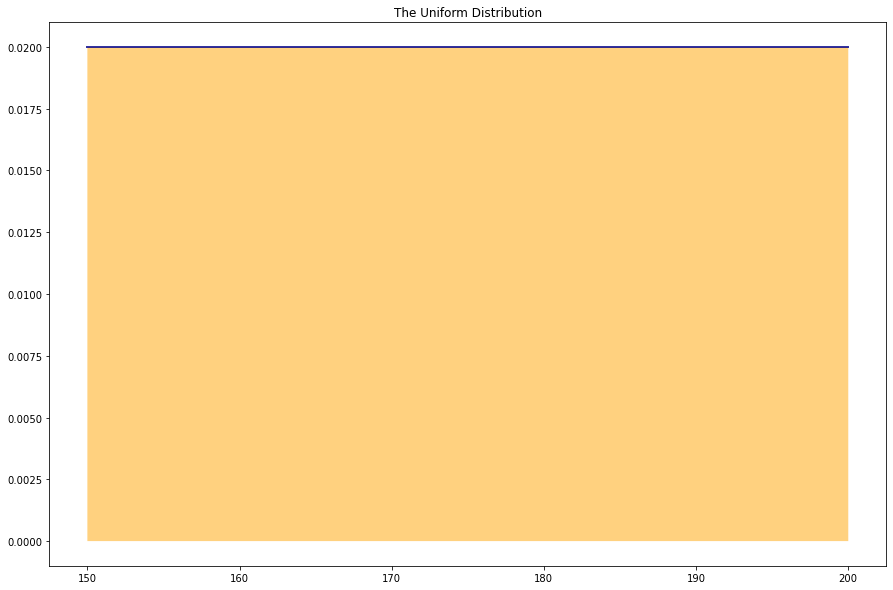

In [7]:
x = np.linspace(150, 200, 1000)
y = stats.uniform.pdf(x, loc=150, scale=50)
plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
plt.fill_between(x, y, facecolor='orange', alpha=0.5)
plt.title(f"The Uniform Distribution")
plt.show()

<br>

__c.__

To find the fraction of steel sheets produced by the machine that have to be scrapped, we must find the probability that $x$, 
the thickness, is less than 160 millimeters. We need to calculate the area under the frequency function $f(x)$ points $x = 150$
and $x = 160$. Therefore, in this case $a = 150$ and $b = 160$. 

We have

$$
\begin{align}
P(x < 160) &= P(150 < x < 160) \\
           &= \frac{b - a}{d - c} = \frac{160 - 150}{200 - 150} = \frac{10}{50} = \frac{1}{5} = 0.20
\end{align}
$$

<br>

That is, $20\%$ of all the sheets made by this machine must be scrapped.

<br>
<br>

Of course, we can also simply use the Uniform CDF.

In [8]:
start = 150
width = 50
stats.uniform(loc=start, scale=width).cdf(160)

0.2

<br>
<br>

<u>__Example 6__</u>

Suppose the length of time (in hours) between emergency arrivals at a certain hospital is modeled as an _exponential distribution_ with $\lambda = 2$. What is the 
probability that more than 5 hours pass without an emergency arrival?

<br>

<u>__Solution__</u>

The probability we want is the area under the curve to right of 5. To find this probability we use the CDF function and the complement rule.

<br>

$$
P(X > 5) = 1 - P(X \le 5) = 1 - .917915 = .082085
$$

<br>

In [13]:
## Set the rate parameter
λ = 2.0

## Use the complement rule
1 - stats.expon(scale=λ).cdf(5)

0.08208499862389884

### __The Central Limit Theorem__

---

Let $X_{1}, X_{2}, \ldots X_{n}$ be independent and identically 
distributed (_iid_) random variables with $E(X_{i}) = \mu$ and
$V(X_{i}) = \sigma^{2} < \infty$. Define

$$
Z_{n} = \sqrt{n} \left( \frac{\bar{X} - \mu}{\sigma} \right) \quad \mbox{where} \quad \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i}
$$

Then the distribution function of $Z_{n}$ converges to a standard
normal distribution as $n \rightarrow \infty$.


That is, $Z_{n} \xrightarrow{d} Z \sim N(0, 1)$ as $n \rightarrow \infty$. 

---

<br>
<br>

<u>__Example n__</u> 


<br>
